## Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.datasets import load_boston

#### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

#### Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)с помощью функции train_test_split так, чтобы размер тестовой выборкисоставлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [3]:
feature_names = boston.feature_names
data = boston.data
price = boston.target

In [4]:
X = pd.DataFrame(data, columns = feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
y = pd.DataFrame(price, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Масштабируйте данные с помощью StandardScaler.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler(with_mean=False)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(random_state=100)

In [12]:
pca.fit(X_test_scaled)

PCA(random_state=100)

In [13]:
pca.explained_variance_ratio_

array([0.46365886, 0.11401877, 0.09775484, 0.06702416, 0.06538962,
       0.05115833, 0.04108269, 0.03042998, 0.02084603, 0.01702393,
       0.01379156, 0.01293276, 0.00488848])

In [14]:
np.sum(pca.explained_variance_ratio_[:7])
# оставим к примеру 7 главных компонент (потеря данных составит менее 10%)

0.9000872688820891

In [15]:
pca = PCA(n_components=7, random_state=100)

In [16]:
X_train_mc = pca.fit_transform(X_train_scaled)
X_test_mc = pca.transform(X_test_scaled)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(X_train_mc, y_train)
# ошибка появилась уже после, причина не ясна. accuracy_score (ниже) был просчитан на уровне 0,8
# тк проверка опциональная, иду по заданиям дальше

/Users/dmitrymorozov/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ValueError: Unknown label type: 'continuous'

In [ ]:
y_test = lr.predict(X_train_mc)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_train)

#### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [20]:
from sklearn.manifold import TSNE

In [21]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [22]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [23]:
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [25]:
X_train_tsne.shape

(404, 2)

In [28]:
import matplotlib.pyplot as plt

#### Постройте диаграмму рассеяния на этих данных.


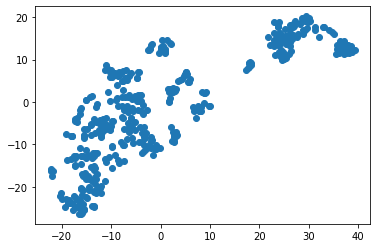

In [29]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

## Задание 2

#### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42


In [31]:
from sklearn.cluster import KMeans

In [82]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [83]:
labels_train = kmeans.fit_predict(X_train)

In [84]:
pd.value_counts(labels_train)

0    297
2     76
1     31
dtype: int64

In [165]:
label_test = kmeans.predict(X_train)

#### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,и раскрасьте точки из разных кластеров разными цветами.


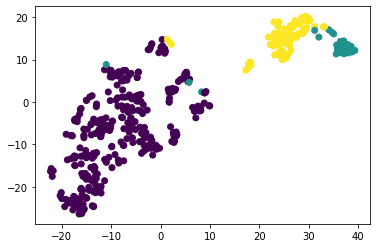

In [166]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [167]:
# странные вылеты у зеленых. при двух кластерах система целостнее выходит.
# только едининияные пограничные значения выпадают

#### Вычислите средние значения price и CRIM в разных кластерах.

In [168]:
y_train.mean()

price    22.796535
dtype: float64

In [169]:
y_train[labels_train==0].mean()

price    25.168687
dtype: float64

In [170]:
y_train[labels_train==1].mean()

price    13.196774
dtype: float64

In [171]:
y_train[labels_train==2].mean()

price    17.442105
dtype: float64

In [172]:
# при средней цене в регионе 22,8 кластер 1 показывает самый низкий прайз в 13,2

Text(0.5, 0, 'Price')

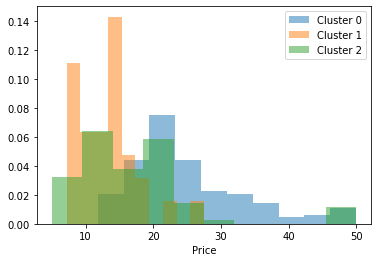

In [173]:
plt.hist(y_train[labels_train==0], bins = 10, density = True, alpha = 0.5)
plt.hist(y_train[labels_train==1], bins = 10, density = True, alpha = 0.5)
plt.hist(y_train[labels_train==2], bins = 10, density = True, alpha = 0.5)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Price')

In [174]:
for line in boston.DESCR.split('/n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [175]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.40486282828282844

In [176]:
X_train.loc[labels_train==1, 'CRIM'].mean()

14.360380322580648

In [177]:
X_train.loc[labels_train==2, 'CRIM'].mean()

11.745661842105266

#### нулевой кластер разительно отличается по уровню престпности среди двух других кластеров
- кол-во комнат (параметр 'RM') между кластерами практически не отличается
- интересное наблюдение по лотам с большой площадью (параметр 'ZN') - все лоты в нулевом кластере (в этом же кластере лучше других по эколошии - NOX, меньше старых домов - AGE, дальше от центров занятости - DIS, отличная транспортная доступность - RAD и самый низкий процент 'популяции низкого статуса' - LSTAT)

## Задание 3

#### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [221]:
labels_test = kmeans.fit_predict(X_test)

In [222]:
pd.value_counts(labels_test)

1    69
2    26
0     7
dtype: int64

In [223]:
labels_test = kmeans.predict(X_test)

In [226]:
X_test_tsne = tsne.fit_transform(X_test)

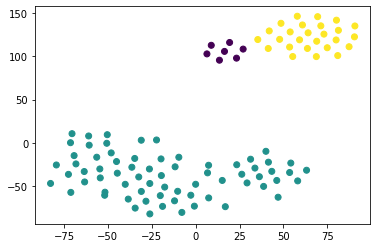

In [227]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=label_test)

In [184]:
y_test.mean()

price    21.488235
dtype: float64

In [229]:
y_test[labels_test==0].mean()

price    12.814286
dtype: float64

In [230]:
y_test[labels_test==1].mean()

price    23.911594
dtype: float64

In [231]:
y_test[labels_test==2].mean()

price    17.392308
dtype: float64

Text(0.5, 0, 'Price')

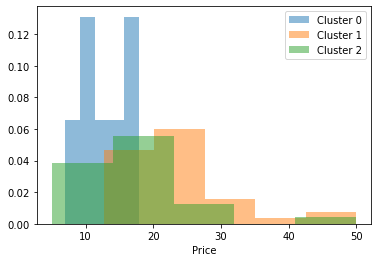

In [233]:
plt.hist(y_test[labels_test==0], bins = 5, density = True, alpha = 0.5)
plt.hist(y_test[labels_test==1], bins = 5, density = True, alpha = 0.5)
plt.hist(y_test[labels_test==2], bins = 5, density = True, alpha = 0.5)
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
plt.xlabel('Price')

In [234]:
X_test.loc[labels_test==0, 'CRIM'].mean()

19.021665714285714

In [235]:
X_test.loc[labels_test==1, 'CRIM'].mean()

0.2464211594202899

In [236]:
X_test.loc[labels_test==2, 'CRIM'].mean()

8.469301923076923

In [237]:
# тестовая выборка показывает разительно отличающиеся индикаторы